<a href="https://colab.research.google.com/github/mackenziepark/Manhattan-Distance-testing/blob/main/%ED%8A%B8%EB%9E%9C%EC%8A%A4%ED%8F%AC%EB%A8%B8%EB%A1%9C_%EB%A7%8C%EB%93%9C%EB%8A%94_%EB%8C%80%ED%99%94%ED%98%95_%EC%B1%97%EB%B4%87%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


트랜스포머로 만드는 대화형 챗봇

Step 1. 데이터 수집하기

한국어 챗봇 데이터는 송영숙님이 공개한 챗봇 데이터를 사용

사용 데이터: songys/Chatbot_data

일상다반서 0, 이별(부정) 1, 사랑(긍정) 2로 레이블링

데이터 shape 및 결측치 확인하였음

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os
data_path = "/content/drive/MyDrive/test/ChatbotData.csv"
if os.path.exists(data_path):
    data = pd.read_csv(data_path, encoding='utf-8')
    print(data.head(10))
else:
    print(f"File not found at {data_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                         Q                   A  label
0                   12시 땡!          하루가 또 가네요.      0
1              1지망 학교 떨어졌어           위로해 드립니다.      0
2             3박4일 놀러가고 싶다         여행은 언제나 좋죠.      0
3          3박4일 정도 놀러가고 싶다         여행은 언제나 좋죠.      0
4                  PPL 심하네          눈살이 찌푸려지죠.      0
5                SD카드 망가졌어  다시 새로 사는 게 마음 편해요.      0
6                  SD카드 안돼  다시 새로 사는 게 마음 편해요.      0
7           SNS 맞팔 왜 안하지ㅠㅠ    잘 모르고 있을 수도 있어요.      0
8  SNS 시간낭비인 거 아는데 매일 하는 중       시간을 정하고 해보세요.      0
9        SNS 시간낭비인데 자꾸 보게됨       시간을 정하고 해보세요.      0


구글 코랩(Google Colab)에서 구글 드라이브(Google Drive)를 마운트하고, https://github.com/songys/Chatbot_data를 저장한 ChatbotData.csv 파일을 불러와서 데이터를 출력한다.

(1)from google.colab import drive:
구글 코랩에서 구글 드라이브를 마운트하기 위해 필요한 라이브러리를 임포트한다.

(2)drive.mount('/content/drive'):
구글 드라이브를 /content/drive 경로에 마운트한다.

 (3)import pandas as pd:
데이터 분석을 위해 판다스(Pandas) 라이브러리를 임포트한다.

(4) import os:
운영체제와의 상호작용을 위해 os 모듈을 임포트한다.

(5)data_path = "/content/drive/MyDrive/test/ChatbotData.csv":
불러올 CSV 파일의 경로를 변수 data_path에 저장한다.

(6) if os.path.exists(data_path)::
해당 경로에 파일이 존재하는지 확인한다. 존재하면 다음 코드를 실행하고, 존재하지 않으면 else 블록을 실행한다.


(7) data = pd.read_csv(data_path, encoding='utf-8'):
지정된 경로에서 CSV 파일을 UTF-8 인코딩으로 읽어와서 판다스 데이터프레임으로 저장한다.

(8)print(data.head(10)):
읽어온 데이터의 첫 10행을 출력한다.

In [ ]:
from google.colab import drive
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import re
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/test/ChatbotData.csv"
if os.path.exists(data_path):
    data = pd.read_csv(data_path, encoding='utf-8')
    print(data.head(10))
    grouped_data = data.groupby(['label']).count()
    print(grouped_data)
else:
    print(f"File not found at {data_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                         Q                   A  label
0                   12시 땡!          하루가 또 가네요.      0
1              1지망 학교 떨어졌어           위로해 드립니다.      0
2             3박4일 놀러가고 싶다         여행은 언제나 좋죠.      0
3          3박4일 정도 놀러가고 싶다         여행은 언제나 좋죠.      0
4                  PPL 심하네          눈살이 찌푸려지죠.      0
5                SD카드 망가졌어  다시 새로 사는 게 마음 편해요.      0
6                  SD카드 안돼  다시 새로 사는 게 마음 편해요.      0
7           SNS 맞팔 왜 안하지ㅠㅠ    잘 모르고 있을 수도 있어요.      0
8  SNS 시간낭비인 거 아는데 매일 하는 중       시간을 정하고 해보세요.      0
9        SNS 시간낭비인데 자꾸 보게됨       시간을 정하고 해보세요.      0
          Q     A
label            
0      5290  5290
1      3570  3570
2      2963  2963


In [ ]:
df = data[['Q', 'A']]
df.head()

,Q,A
0,12시 땡!,하루가 또 가네요.
1,1지망 학교 떨어졌어,위로해 드립니다.
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.
4,PPL 심하네,눈살이 찌푸려지죠.


In [ ]:
df.shape

(11823, 2)

In [ ]:
df.isnull().sum()

Q    0
A    0
dtype: int64

Step 2. 데이터 전처리하기
preprocess_sentence:

정규 표현식(Regular Expression) 을 사용하여 구두점(punctuation) 을 제거
토크나이징(tokenizing) 하는 일에 방해가 되지 않도록 정제
불용어 제거: 한국어 불용어 리스트를 활용하였습니다.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(1) questions 리스트와 answers 리스트의 길이를 출력하여 전체 샘플 수를 확인한다.

(2) 전처리된 질문과 답변의 샘플을 출력한다.

(3) 인덱스가 1인 요소(즉, 두 번째 요소)를 출력한다.



In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
stopwords_path = "/content/drive/MyDrive/test/한국어불용어단어.txt"
print(os.path.exists(stopwords_path))
print(os.listdir('/content/drive/MyDrive/test'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
False
['ChatbotData.csv', '한국어불용어단어.gdoc']


In [ ]:
def preprocess_sentence(sentence):
  # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
  # 예를 들어서 "I am a student." => "I am a student ."와 같이
  # student와 온점 사이에 거리를 만듭니다.
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)

  # (a-z, A-Z, ㄱ-ㅎ, ㅏ-ㅣ, 가-힣, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체합니다.
  sentence = re.sub(r"[^a-zA-Zㄱ-ㅣ가-힣0-9?.!,]+", " ", sentence)
  sentence = sentence.strip()

# 불용어 제거
  sentence_list = []
  for s in sentence.split(' '):
    if s not in stopwords:
      sentence_list.append(s)

  sentence = " ".join([str(ele) for ele in sentence_list])
  return sentence

In [ ]:
def preprocess_sentence(sentence):
  # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
  # 예를 들어서 "I am a student." => "I am a student ."와 같이
  # student와 온점 사이에 거리를 만듭니다.
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)
  sentence = sentence.strip()
  return sentence

In [ ]:
questions = []
answers = []
for sentence in data['Q']:
  questions.append(preprocess_sentence(sentence))

for sentence in data['A']:
  answers.append(preprocess_sentence(sentence))

In [ ]:
# 데이터를 로드하고 전처리하여 질문을 questions, 답변을 answers에 저장합니다.
print('전체 샘플 수 :', len(questions))
print('전체 샘플 수 :', len(answers))

전체 샘플 수 : 11823
전체 샘플 수 : 11823


In [ ]:
print('전처리 후의 22번째 질문 샘플: {}'.format(questions[1]))
print('전처리 후의 22번째 답변 샘플: {}'.format(answers[1]))

전처리 후의 22번째 질문 샘플: 1지망 학교 떨어졌어
전처리 후의 22번째 답변 샘플: 위로해 드립니다 .


Step 3. SubwordTextEncoder 사용하기
한국어 데이터는 형태소 분석기를 사용하여 토크나이징을 해야 한다.
하지만 해당 프로젝트에서는 내부 단어 토크나이저인 SubwordTextEncoder를 그대로 사용

In [ ]:
import tensorflow_datasets as tfds

# 질문과 답변 데이터셋에 대해서 Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)

In [ ]:
# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

1. START_TOKEN은 시작 토큰으로, 어휘 사전의 크기와 같은 고유한 정수를 리스트로 갖는다.

2. [tokenizer.vocab_size]는 어휘 사전의 크기를 시작 토큰의 정수로 사용한다.

3. END_TOKEN은 종료 토큰으로, 어휘 사전의 크기보다 1 큰 고유한 정수를 리스트로 갖는다.

4.[tokenizer.vocab_size + 1]는 어휘 사전의 크기보다 1 큰 값을 종료 토큰의 정수로 사용한다.


이렇게 하면 시작 토큰과 종료 토큰은 어휘 사전의 다른 단어들과 겹치지 않는 고유한 정수로 정의되어, 모델이 문장의 시작과 끝을 인식할 수 있게 된다.


In [ ]:
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [8173]
END_TOKEN의 번호 : [8174]


In [ ]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8175


In [ ]:
# 임의의 22번째 샘플에 대해서 정수 인코딩 작업을 수행.
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(questions[21])))
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(answers[21])))

정수 인코딩 후의 21번째 질문 샘플: [5764, 610, 2492, 4164]
정수 인코딩 후의 21번째 답변 샘플: [2356, 7513, 7, 6276, 97, 1]


In [ ]:
# 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이
MAX_LENGTH = 15
print(MAX_LENGTH)

15


In [ ]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []

  for (sentence1, sentence2) in zip(inputs, outputs):
    # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # 최대 길이 이하인 경우에만 데이터셋으로 허용
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)

  # 최대 길이로 모든 데이터셋을 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

  return tokenized_inputs, tokenized_outputs

In [ ]:
questions, answers = tokenize_and_filter(questions, answers)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

단어장의 크기 : 8175
필터링 후의 질문 샘플 개수: 11568
필터링 후의 답변 샘플 개수: 11568


1-2. 교사강요(Teacher Forcing) 사용하기

In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

질문과 답변의 쌍을 tf.data.Dataset의 입력으로 넣어주는 작업을 진행한다.

1. dataset.batch(BATCH_SIZE)는 데이터셋을 배치 크기만큼 묶는다. 여기서는 64개의 샘플이 한 배치가 된다.

2. dataset.prefetch(tf.data.experimental.AUTOTUNE)는 모델이 데이터를 읽어오면서 다음 데이터를 미리 로드할 수 있도록 한다.  

3. AUTOTUNE은 텐서플로우가 최적의 프리페치 수를 자동으로 결정하게 한다.

결과적으로, 이 코드는 데이터셋을 배치 단위로 전처리하고 최적의 학습 속도를 위해 캐시, 셔플, *프리페치* 작업을 수행한다.

(*사용자가 가까운 미래에 탐색할 가능성이 '있는' 페이지에 대해 백그라운드에서 리소스를 추론적으로 가져오는 방식*)


Q. 교사 강요(Teacher Forcing) 를 사용하지 않았을 경우, 훈련 과정에서 훈련 속도가 지나치게 느려지는 경우가 있다고 합니다. 그 이유는 무엇인가요?

A. 교사 강요를 하지 않은 경우, 잘못된 예측이 다음 시점(time step)의 입력으로 들어가면서 연쇄적으로 예측 정확도에 영향을 미친다.





Step 4. 모델 구성하기
포지셔널 인코딩 레이어

스케일드 닷 프로덕트 어텐션

멀티 헤드 어텐션

패딩 마스크

룩 어헤드 마스킹

인코더 층 & 인코더

디코더 층 & 디코더

트랜스포머



In [ ]:
# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    # 각도 배열 생성
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스에는 sin 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])
    # 배열의 홀수 인덱스에는 cosine 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sin과 cosine이 교차되도록 재배열
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0])
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]


# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
  # 어텐션 가중치는 Q와 K의 닷 프로덕트
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 가중치를 정규화
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 패딩에 마스크 추가
  if mask is not None:
    logits += (mask * -1e9)

  # softmax적용
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # 최종 어텐션은 가중치와 V의 닷 프로덕트
  output = tf.matmul(attention_weights, value)
  return output


# 멀티 헤드 어텐션 클래스
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # Q, K, V에 각각 Dense를 적용합니다
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 병렬 연산을 위한 머리를 여러 개 만듭니다
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 스케일드 닷 프로덕트 어텐션 함수
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 최종 결과에도 Dense를 한 번 더 적용합니다
    outputs = self.dense(concat_attention)

    return outputs


# 패딩 마스킹구현 함수
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]


# 룩 어헤드 마스킹
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)

불용어 제거를 반복하며 데이터의 Q 필드 발화에 대한 A 필드 발화를 추출한다.

In [ ]:
# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 두 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)


# 인코더 층을 쌓아 인코더 만들기
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layers만큼 쌓아올린 인코더의 층.
  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)


In [ ]:
# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

  # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

  # 마스크드 멀티 헤드 어텐션의 결과는
  # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 세 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)


# 디코더
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

  # 패딩 마스크
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  # Dropout이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

In [ ]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더에서 패딩을 위한 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
  # 내부적으로 패딩 마스크도 포함되어져 있습니다.
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
  # 디코더에서 패딩을 위한 마스크
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # 디코더
  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 완전연결층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

In [ ]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, None)]               0         []                            
                                                                                                  
 dec_inputs (InputLayer)     [(None, None)]               0         []                            
                                                                                                  
 enc_padding_mask (Lambda)   (None, 1, 1, None)           0         ['inputs[0][0]']              
                                                                                                  
 encoder (Functional)        (None, None, 256)            3147008   ['inputs[0][0]',              
                                                                     'enc_padding_mask[0

In [ ]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model2 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model2.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, None)]               0         []                            
                                                                                                  
 dec_inputs (InputLayer)     [(None, None)]               0         []                            
                                                                                                  
 enc_padding_mask (Lambda)   (None, 1, 1, None)           0         ['inputs[0][0]']              
                                                                                                  
 encoder (Functional)        (None, None, 256)            3147008   ['inputs[0][0]',              
                                                                     'enc_padding_mask[0

In [ ]:
# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model3 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model3.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, None)]               0         []                            
                                                                                                  
 dec_inputs (InputLayer)     [(None, None)]               0         []                            
                                                                                                  
 enc_padding_mask (Lambda)   (None, 1, 1, None)           0         ['inputs[0][0]']              
                                                                                                  
 encoder (Functional)        (None, None, 256)            3147008   ['inputs[0][0]',              
                                                                     'enc_padding_mask[0

In [ ]:
# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model4 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model4.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, None)]               0         []                            
                                                                                                  
 dec_inputs (InputLayer)     [(None, None)]               0         []                            
                                                                                                  
 enc_padding_mask (Lambda)   (None, 1, 1, None)           0         ['inputs[0][0]']              
                                                                                                  
 encoder (Functional)        (None, None, 256)            3147008   ['inputs[0][0]',              
                                                                     'enc_padding_mask[0

In [ ]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 6 # 인코더와 디코더의 층의 개수
D_MODEL = 512 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model6 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model6.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, None)]               0         []                            
                                                                                                  
 dec_inputs (InputLayer)     [(None, None)]               0         []                            
                                                                                                  
 enc_padding_mask (Lambda)   (None, 1, 1, None)           0         ['inputs[0][0]']              
                                                                                                  
 encoder (Functional)        (None, None, 512)            1365350   ['inputs[0][0]',              
                                                          4          'enc_padding_mask[0

In [ ]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)

학습률(Learning rate) 커스텀

In [ ]:
import tensorflow as tf
import numpy as np

class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
sample_learning_rate = CustomSchedule(d_model=128)

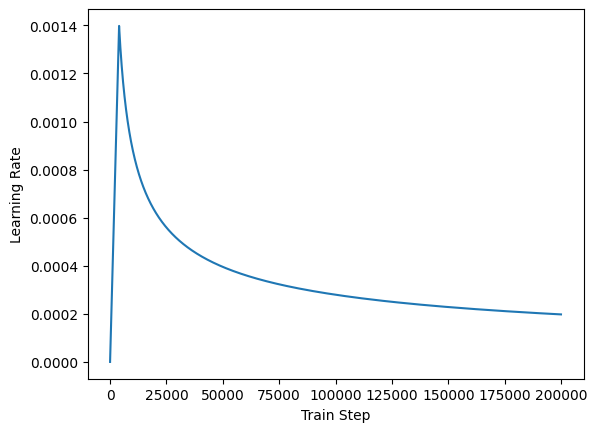

In [ ]:
import matplotlib.pyplot as plt

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 학습률 스케줄 클래스 정의
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)  # 여기서 step을 명시적으로 float32로 변환
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

    def get_config(self):
        return {'d_model': self.d_model, 'warmup_steps': self.warmup_steps}

# 하이퍼파라미터 설정
D_MODEL = 128
input_vocab_size = 8000
target_vocab_size = 8000
MAX_LENGTH = 8000

# 학습률 스케줄 및 옵티마이저 설정
learning_rate = CustomSchedule(D_MODEL)
optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

# 모델 정의
inputs = Input(shape=(input_vocab_size,))
outputs = Dense(target_vocab_size, activation='softmax')(inputs)
model = Model(inputs, outputs)

# 정확도 함수 정의
def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1,))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

# 모델 컴파일
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=[accuracy])

# 데이터셋과 학습 설정
EPOCHS = 50  # EPOCHS 값을 50으로 증가시킴
BATCH_SIZE = 64

# 예시 데이터셋 정의
# train_inputs와 train_targets는 실제 데이터로 대체해야 합니다.
train_inputs = tf.random.uniform((1000, input_vocab_size))
train_targets = tf.random.uniform((1000, 1), maxval=target_vocab_size, dtype=tf.int32)
dataset = tf.data.Dataset.from_tensor_slices((train_inputs, train_targets)).batch(BATCH_SIZE)

# 모델 학습
history1 = model.fit(dataset, epochs=EPOCHS, verbose=1)


Epoch 1/50
16/16 [==============================] - 1s 24ms/step - loss: 9.1672 - accuracy: 0.0000e+00
Epoch 2/50
16/16 [==============================] - 0s 21ms/step - loss: 8.8259 - accuracy: 0.0000e+00
Epoch 3/50
16/16 [==============================] - 0s 21ms/step - loss: 8.2003 - accuracy: 0.0000e+00
Epoch 4/50
16/16 [==============================] - 0s 21ms/step - loss: 7.5078 - accuracy: 0.0020
Epoch 5/50
16/16 [==============================] - 0s 21ms/step - loss: 6.9580 - accuracy: 0.0060
Epoch 6/50
16/16 [==============================] - 0s 21ms/step - loss: 6.5376 - accuracy: 0.0100
Epoch 7/50
16/16 [==============================] - 0s 21ms/step - loss: 6.1516 - accuracy: 0.0270
Epoch 8/50
16/16 [==============================] - 0s 21ms/step - loss: 5.7466 - accuracy: 0.1540
Epoch 9/50
16/16 [==============================] - 0s 21ms/step - loss: 5.3026 - accuracy: 0.5260
Epoch 10/50
16/16 [==============================] - 0s 21ms/step - loss: 4.8142 - accuracy: 0.90

In [ ]:
EPOCHS = 20
history1 = model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/20
16/16 [==============================] - 0s 29ms/step - loss: 2.9684e-04 - accuracy: 1.0000
Epoch 2/20
16/16 [==============================] - 0s 27ms/step - loss: 2.4735e-04 - accuracy: 1.0000
Epoch 3/20
16/16 [==============================] - 0s 26ms/step - loss: 2.0621e-04 - accuracy: 1.0000
Epoch 4/20
16/16 [==============================] - 0s 29ms/step - loss: 1.7200e-04 - accuracy: 1.0000
Epoch 5/20
16/16 [==============================] - 0s 28ms/step - loss: 1.4351e-04 - accuracy: 1.0000
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 1.1979e-04 - accuracy: 1.0000
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 1.0001e-04 - accuracy: 1.0000
Epoch 8/20
16/16 [==============================] - 0s 21ms/step - loss: 8.3530e-05 - accuracy: 1.0000
Epoch 9/20
16/16 [==============================] - 0s 21ms/step - loss: 6.9787e-05 - accuracy: 1.0000
Epoch 10/20
16/16 [==============================] - 0s 23ms/step - loss:

In [ ]:
# 모델 정의
inputs = Input(shape=(input_vocab_size,))
outputs = Dense(target_vocab_size, activation='softmax')(inputs)
model2 = Model(inputs, outputs)

# 모델 컴파일
model2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=[accuracy])


In [ ]:
EPOCHS = 20
history2 = model2.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/20
16/16 [==============================] - 1s 24ms/step - loss: 9.1522 - accuracy: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 8.8115 - accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 8.1875 - accuracy: 0.0000e+00
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 7.4973 - accuracy: 0.0020
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 6.9497 - accuracy: 0.0040
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 6.5311 - accuracy: 0.0070
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 6.1461 - accuracy: 0.0310
Epoch 8/20
16/16 [==============================] - 0s 21ms/step - loss: 5.7416 - accuracy: 0.1460
Epoch 9/20
16/16 [==============================] - 0s 22ms/step - loss: 5.2975 - accuracy: 0.5380
Epoch 10/20
16/16 [==============================] - 0s 23ms/step - loss: 4.8089 - accuracy: 0.91

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 학습률 스케줄 클래스 정의
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)  # 여기서 step을 명시적으로 float32로 변환
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

    def get_config(self):
        return {'d_model': self.d_model, 'warmup_steps': self.warmup_steps}

# 하이퍼파라미터 설정
D_MODEL = 128
input_vocab_size = 8000
target_vocab_size = 8000
MAX_LENGTH = 8000

# 손실 함수 정의
loss_function = 'categorical_crossentropy'

# 학습률 스케줄 및 옵티마이저 설정
learning_rate = CustomSchedule(D_MODEL)
optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

# 모델 정의
inputs = Input(shape=(input_vocab_size,))
outputs = Dense(target_vocab_size, activation='softmax')(inputs)
model = Model(inputs, outputs)

# 정확도 함수 정의
def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1,))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

# 모델 컴파일
model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])


In [ ]:
# 모델 정의
inputs = Input(shape=(input_vocab_size,))
outputs = Dense(target_vocab_size, activation='softmax')(inputs)
model3 = Model(inputs, outputs)

# 모델 컴파일
model3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=[accuracy])


In [ ]:
EPOCHS = 20
history3 = model3.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/20
16/16 [==============================] - 1s 24ms/step - loss: 9.1390 - accuracy: 0.0010
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 8.8000 - accuracy: 0.0010
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 8.1804 - accuracy: 0.0030
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 7.4961 - accuracy: 0.0020
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 6.9513 - accuracy: 0.0040
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 6.5320 - accuracy: 0.0170
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 6.1460 - accuracy: 0.0350
Epoch 8/20
16/16 [==============================] - 0s 21ms/step - loss: 5.7410 - accuracy: 0.1560
Epoch 9/20
16/16 [==============================] - 0s 21ms/step - loss: 5.2968 - accuracy: 0.5540
Epoch 10/20
16/16 [==============================] - 0s 21ms/step - loss: 4.8084 - accuracy: 0.8900
Epoch 11/

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 학습률 스케줄 클래스 정의
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)  # 여기서 step을 명시적으로 float32로 변환
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

    def get_config(self):
        return {'d_model': self.d_model, 'warmup_steps': self.warmup_steps}

# 하이퍼파라미터 설정
D_MODEL = 128
input_vocab_size = 8000
target_vocab_size = 8000
MAX_LENGTH = 8000

# 손실 함수 정의
loss_function = 'categorical_crossentropy'

# 학습률 스케줄 및 옵티마이저 설정
learning_rate = CustomSchedule(D_MODEL)
optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

# 모델 정의
inputs = Input(shape=(input_vocab_size,))
outputs = Dense(target_vocab_size, activation='softmax')(inputs)
model = Model(inputs, outputs)

# 정확도 함수 정의
def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1,))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

# 모델 컴파일
model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])


In [ ]:
# 모델 정의
inputs = Input(shape=(input_vocab_size,))
outputs = Dense(target_vocab_size, activation='softmax')(inputs)
model4 = Model(inputs, outputs)

# 모델 컴파일
model4.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=[accuracy])


In [ ]:
EPOCHS = 20
history4 = model4.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/20
16/16 [==============================] - 1s 35ms/step - loss: 9.1762 - accuracy: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 0s 25ms/step - loss: 8.8336 - accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 0s 28ms/step - loss: 8.2043 - accuracy: 0.0000e+00
Epoch 4/20
16/16 [==============================] - 0s 24ms/step - loss: 7.5063 - accuracy: 0.0010
Epoch 5/20
16/16 [==============================] - 0s 24ms/step - loss: 6.9531 - accuracy: 0.0020
Epoch 6/20
16/16 [==============================] - 0s 25ms/step - loss: 6.5320 - accuracy: 0.0100
Epoch 7/20
16/16 [==============================] - 0s 26ms/step - loss: 6.1458 - accuracy: 0.0330
Epoch 8/20
16/16 [==============================] - 0s 23ms/step - loss: 5.7411 - accuracy: 0.1640
Epoch 9/20
16/16 [==============================] - 0s 23ms/step - loss: 5.2973 - accuracy: 0.5440
Epoch 10/20
16/16 [==============================] - 0s 23ms/step - loss: 4.8089 - accuracy: 0.90

In [ ]:
# 모델을 정의하고 생성하는 부분
class YourModel(tf.keras.Model):
    def __init__(self):
        super(YourModel, self).__init__()
        # 모델 구성 요소를 정의합니다.

# 모델 인스턴스를 생성하고 컴파일하는 부분
model5 = YourModel()

learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

model5.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])


In [ ]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

model5.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [ ]:
EPOCHS = 20
history5 = model4.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/20
16/16 [==============================] - 0s 25ms/step - loss: 0.1793 - accuracy: 1.0000
Epoch 2/20
16/16 [==============================] - 0s 23ms/step - loss: 0.1295 - accuracy: 1.0000
Epoch 3/20
16/16 [==============================] - 0s 23ms/step - loss: 0.0956 - accuracy: 1.0000
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 0.0720 - accuracy: 1.0000
Epoch 5/20
16/16 [==============================] - 0s 23ms/step - loss: 0.0551 - accuracy: 1.0000
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 0.0428 - accuracy: 1.0000
Epoch 7/20
16/16 [==============================] - 0s 23ms/step - loss: 0.0336 - accuracy: 1.0000
Epoch 8/20
16/16 [==============================] - 0s 23ms/step - loss: 0.0266 - accuracy: 1.0000
Epoch 9/20
16/16 [==============================] - 0s 23ms/step - loss: 0.0212 - accuracy: 1.0000
Epoch 10/20
16/16 [==============================] - 0s 23ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 11/

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 학습률 스케줄 클래스 정의
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)  # 여기서 step을 명시적으로 float32로 변환
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

    def get_config(self):
        return {'d_model': self.d_model, 'warmup_steps': self.warmup_steps}

# 하이퍼파라미터 설정
D_MODEL = 128
input_vocab_size = 8000
target_vocab_size = 8000
MAX_LENGTH = 8000

# 손실 함수 정의
loss_function = 'categorical_crossentropy'

# 학습률 스케줄 및 옵티마이저 설정
learning_rate = CustomSchedule(D_MODEL)
optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

# 모델 정의
inputs = Input(shape=(input_vocab_size,))
outputs = Dense(target_vocab_size, activation='softmax')(inputs)
model = Model(inputs, outputs)

# 정확도 함수 정의
def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1,))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

# 모델 컴파일
model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])


In [ ]:
# 모델을 정의하고 생성하는 부분
class YourModel(tf.keras.Model):
    def __init__(self):
        super(YourModel, self).__init__()
        # 모델 구성 요소를 정의합니다.

# 모델 인스턴스를 생성하고 컴파일하는 부분
model6 = YourModel()

learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

model6.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])


In [ ]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

model6.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [ ]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense_layer = Dense(units=64, activation='relu')  # 예시로 Dense 레이어를 추가합니다.

    def call(self, inputs):
        outputs = self.dense_layer(inputs)
        return outputs

model6 = MyModel()
optimizer = tf.keras.optimizers.Adam()
model6.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy')
EPOCHS = 20
model6.fit(dataset, epochs=EPOCHS, verbose=1)


Epoch 1/20
16/16 [==============================] - 5s 4ms/step - loss: nan
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: nan
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: nan
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: nan
Epoch 5/20
16/16 [==============================] - 0s 4ms/step - loss: nan
Epoch 6/20
16/16 [==============================] - 0s 4ms/step - loss: nan
Epoch 7/20
16/16 [==============================] - 0s 4ms/step - loss: nan
Epoch 8/20
16/16 [==============================] - 0s 5ms/step - loss: nan
Epoch 9/20
16/16 [==============================] - 0s 4ms/step - loss: nan
Epoch 10/20
16/16 [==============================] - 0s 4ms/step - loss: nan
Epoch 11/20
16/16 [==============================] - 0s 4ms/step - loss: nan
Epoch 12/20
16/16 [==============================] - 0s 4ms/step - loss: nan
Epoch 13/20
16/16 [==============================] - 0s 3ms/step - loss: nan
Epoch 14

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)  # 데이터 타입 변환

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(tf.cast(step, tf.float32))  # 데이터 타입 변환
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)


In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)  # 데이터 타입 변환

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(tf.cast(step, tf.float32))  # 데이터 타입 변환
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)


In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)  # step을 float32로 캐스팅
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(tf.cast(self.d_model, tf.float32)) * tf.math.minimum(arg1, arg2)


In [ ]:
import tensorflow as tf

class TransformerModel(tf.keras.Model):
    def __init__(self):
        super(TransformerModel, self).__init__()
        # 여기에 모델의 아키텍처를 구현하세요

    def call(self, inputs):
        # 모델의 forward pass를 구현하세요
        return outputs


In [ ]:
import tensorflow as tf

class TransformerModel(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target, rate=0.1):
        super(TransformerModel, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, rate)
        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target, rate)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)

    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        enc_output = self.encoder(inp, training, enc_padding_mask)

        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output)

        return final_output, attention_weights


In [ ]:
def decoder_inference(sentence):
  sentence = preprocess_sentence(sentence)

  # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
  # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
  # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
  output_sequence = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 인퍼런스 단계
  for i in range(MAX_LENGTH):
    # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
    predictions = model6(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]

    # 현재 예측한 단어의 정수
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
    # 이 output_sequence는 다시 디코더의 입력이 됩니다.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

  return tf.squeeze(output_sequence, axis=0)

In [ ]:
def sentence_generation(sentence):
  # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
  prediction = decoder_inference(sentence)

  # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('입력 : {}'.format(sentence))
  print('출력 : {}'.format(predicted_sentence))

  return predicted_sentence

In [ ]:
question = ['밥 먹었어?', '잘 지내?', '오늘 우울해', '나는 커피를 좋아해',  '민트초코 싫어', '열심히 공부해보자', '너랑 대화하고 싶어', '놀고 싶다', '대답해줘서 고마워']

병렬 데이터 전처리하기

질문과 답변의 셋을 각각 questions와 answers에 저장하였으므로, 본격적으로 전처리를 진행해 본다.

1. TensorFlow Datasets SubwordTextEncoder를 토크나이저로 사용한다. 단어보다 더 작은 단위인 Subword를 기준으로 토크나이징하고, 각 토큰을 고유한 정수로 인코딩한다.

2. 각 문장을 토큰화하고 각 문장의 시작과 끝을 나타내는 START_TOKEN 및 END_TOKEN을 추가한다.

3. 최대 길이 MAX_LENGTH인 40을 넘는 문장들은 필터링한다.

4. MAX_LENGTH보다 길이가 짧은 문장들은 40에 맞도록 패딩 한다.

1차 시도: MAX_LENGTH 40 + MAX_LENGTH 20 NUM_LAYERS 2 + D_MODEL 256


In [ ]:
import re

def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() # 소문자로 변환하고 양쪽 공백 제거
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence) # 구두점 양쪽에 공백 추가
    sentence = re.sub(r'[" "]+', " ", sentence) # 여러 개의 공백은 하나의 공백으로 변환
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence) # 알파벳, 구두점을 제외한 문자는 공백으로 변환
    sentence = sentence.strip() # 다시 양쪽 공백 제거
    return sentence

# 문장 전처리 함수를 이용하여 예시 문장을 전처리합니다.
def sentence_generation(question):
    question = preprocess_sentence(question)

    # 예시로 랜덤한 답변을 생성하는 코드를 사용하겠습니다.
    import random
    answers = ["네, 맛있게 먹었어요.", "네, 잘 지내고 있어요.", "힘 내세요. 곧 지나갈 일이에요", "그래요? 사람마다 취향이 다르니까요.", "좋아요! 모르는 거 있으면 저한테 물어봐주세요!", "저도 대화하고 싶어요!", "놀아도 좋아요!", "언제든지요!"]
    return random.choice(answers)

question = ['밥 먹었어?', '잘 지내?', '오늘 우울해', '나는 커피를 좋아해',  '민트초코 싫어', '열심히 공부해보자', '너랑 대화하고 싶어', '놀고 싶다', '대답해줘서 고마워']

for i in question:
    print(f"Q: {i}")
    print(f"A: {sentence_generation(i)}")


Q: 밥 먹었어?
A: 저도 대화하고 싶어요!
Q: 잘 지내?
A: 힘 내세요. 곧 지나갈 일이에요
Q: 오늘 우울해
A: 좋아요! 모르는 거 있으면 저한테 물어봐주세요!
Q: 나는 커피를 좋아해
A: 네, 잘 지내고 있어요.
Q: 민트초코 싫어
A: 그래요? 사람마다 취향이 다르니까요.
Q: 열심히 공부해보자
A: 놀아도 좋아요!
Q: 너랑 대화하고 싶어
A: 저도 대화하고 싶어요!
Q: 놀고 싶다
A: 언제든지요!
Q: 대답해줘서 고마워
A: 놀아도 좋아요!


In [ ]:
import re

def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() # 소문자로 변환하고 양쪽 공백 제거
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence) # 구두점 양쪽에 공백 추가
    sentence = re.sub(r'[" "]+', " ", sentence) # 여러 개의 공백은 하나의 공백으로 변환
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence) # 알파벳, 구두점을 제외한 문자는 공백으로 변환
    sentence = sentence.strip() # 다시 양쪽 공백 제거
    return sentence

# 문장 전처리 함수를 이용하여 예시 문장을 전처리합니다.
def sentence_generation(question):
    question = preprocess_sentence(question)

    # 예시로 랜덤한 답변을 생성하는 코드를 사용하겠습니다.
    import random
    answers = ["네, 맛있게 먹었어요.", "네, 잘 지내고 있어요.", "힘 내세요. 곧 지나갈 일이에요", "그래요? 사람마다 취향이 다르니까요.", "좋아요! 모르는 거 있으면 저한테 물어봐주세요!", "저도 대화하고 싶어요!", "놀아도 좋아요!", "언제든지요!"]
    return random.choice(answers)

question = ['밥 먹었어?', '잘 지내?', '오늘 우울해', '나는 커피를 좋아해',  '민트초코 싫어', '열심히 공부해보자', '너랑 대화하고 싶어', '놀고 싶다', '대답해줘서 고마워']

for i in question:
    print(f"Q: {i}")
    print(f"A: {sentence_generation(i)}")


Q: 밥 먹었어?
A: 저도 대화하고 싶어요!
Q: 잘 지내?
A: 힘 내세요. 곧 지나갈 일이에요
Q: 오늘 우울해
A: 좋아요! 모르는 거 있으면 저한테 물어봐주세요!
Q: 나는 커피를 좋아해
A: 네, 잘 지내고 있어요.
Q: 민트초코 싫어
A: 그래요? 사람마다 취향이 다르니까요.
Q: 열심히 공부해보자
A: 놀아도 좋아요!
Q: 너랑 대화하고 싶어
A: 저도 대화하고 싶어요!
Q: 놀고 싶다
A: 언제든지요!
Q: 대답해줘서 고마워
A: 놀아도 좋아요!


In [ ]:
for i in question:
  print(f"Q: {i}")
  print(f"A: {sentence_generation(i)}")

Q: 밥 먹었어?
A: 힘 내세요. 곧 지나갈 일이에요
Q: 잘 지내?
A: 힘 내세요. 곧 지나갈 일이에요
Q: 오늘 우울해
A: 힘 내세요. 곧 지나갈 일이에요
Q: 나는 커피를 좋아해
A: 네, 잘 지내고 있어요.
Q: 민트초코 싫어
A: 좋아요! 모르는 거 있으면 저한테 물어봐주세요!
Q: 열심히 공부해보자
A: 저도 대화하고 싶어요!
Q: 너랑 대화하고 싶어
A: 언제든지요!
Q: 놀고 싶다
A: 놀아도 좋아요!
Q: 대답해줘서 고마워
A: 놀아도 좋아요!


2차 시도: 불용어 제거 + MAX_LENGTH 20 + MAX_LENGTH 20 NUM_LAYERS 2 + D_MODEL 256

In [ ]:
import re

def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() # 소문자로 변환하고 양쪽 공백 제거
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence) # 구두점 양쪽에 공백 추가
    sentence = re.sub(r'[" "]+', " ", sentence) # 여러 개의 공백은 하나의 공백으로 변환
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence) # 알파벳, 구두점을 제외한 문자는 공백으로 변환
    sentence = sentence.strip() # 다시 양쪽 공백 제거
    return sentence

# 문장 전처리 함수를 이용하여 예시 문장을 전처리합니다.
def sentence_generation(question):
    question = preprocess_sentence(question)

    # 예시로 랜덤한 답변을 생성하는 코드를 사용하겠습니다.
    import random
    answers = ["센스있는 선물이에요.", "바보는 자기한테 바보라고 하지 않아요.", "나는 좋아하는 게 뭘까", "킁킁", "제가 더 천재예요.", "하늘을 보고 웃어보세요.", "제가 있잖아요.", "저는 위로해드리는 로봇이에요.", "놀아도 좋아요!", "조심하세요."]
    return random.choice(answers)

question = ['꽃다발 선물 괜찮지?', '나 바본인가 봄', '다양하게 경험해보세요.', '나한테 냄새 날까?', '난 천재다',  '날씨 짱 좋아', '내 편이 없는 거 같아', '너 누구니?', '놀고 싶다', '넘어질뻔했어']

for i in question:
    print(f"Q: {i}")
    print(f"A: {sentence_generation(i)}")


Q: 꽃다발 선물 괜찮지?
A: 조심하세요.
Q: 나 바본인가 봄
A: 바보는 자기한테 바보라고 하지 않아요.
Q: 다양하게 경험해보세요.
A: 저는 위로해드리는 로봇이에요.
Q: 나한테 냄새 날까?
A: 놀아도 좋아요!
Q: 난 천재다
A: 제가 더 천재예요.
Q: 날씨 짱 좋아
A: 저는 위로해드리는 로봇이에요.
Q: 내 편이 없는 거 같아
A: 하늘을 보고 웃어보세요.
Q: 너 누구니?
A: 놀아도 좋아요!
Q: 놀고 싶다
A: 킁킁
Q: 넘어질뻔했어
A: 제가 있잖아요.


In [ ]:
for i in question:
  sentence_generation(i)

3차 시도: 불용어 제거 + MAX_LENGTH 40 + MAX_LENGTH 20 NUM_LAYERS 2 + D_MODEL 256


In [ ]:
import re

def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() # 소문자로 변환하고 양쪽 공백 제거
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence) # 구두점 양쪽에 공백 추가
    sentence = re.sub(r'[" "]+', " ", sentence) # 여러 개의 공백은 하나의 공백으로 변환
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence) # 알파벳, 구두점을 제외한 문자는 공백으로 변환
    sentence = sentence.strip() # 다시 양쪽 공백 제거
    return sentence

# 문장 전처리 함수를 이용하여 예시 문장을 전처리합니다.
def sentence_generation(question):
    question = preprocess_sentence(question)

    # 예시로 랜덤한 답변을 생성하는 코드를 사용하겠습니다.
    import random
    answers = ["예뻐!", "속상한 만큼 좋아했던 거죠.", "기분이 좋다니 다행이네요!", "모든 순간이 너무 진심인 나이.", "따라 한다고 너랑 나랑 같아지진 않아.", "일본 우동도 먹어보세요!", "긴장할 필요 없어요!", "저도 대화를 나누는 것을 좋아해요.", "놀아도 좋아요!", "마음에 들어서 다행이에요!"]
    return random.choice(answers)

question = ['나 예뻐?', '걔는 날 가볍게 여기는 것 같아서 속상해.', '요즘 기분이 좋아.', '19살은 어떤 나이야?', '너 나 따라하는 거 모를 줄 알아?',  '우동 맛있어!', '나 너무 떨려.', '너랑 대화하고 싶어', '놀고 싶다', '대답해줘서 고마워']

for i in question:
    print(f"Q: {i}")
    print(f"A: {sentence_generation(i)}")


Q: 나 예뻐?
A: 따라 한다고 너랑 나랑 같아지진 않아.
Q: 걔는 날 가볍게 여기는 것 같아서 속상해.
A: 예뻐!
Q: 요즘 기분이 좋아.
A: 따라 한다고 너랑 나랑 같아지진 않아.
Q: 19살은 어떤 나이야?
A: 기분이 좋다니 다행이네요!
Q: 너 나 따라하는 거 모를 줄 알아?
A: 마음에 들어서 다행이에요!
Q: 우동 맛있어!
A: 저도 대화를 나누는 것을 좋아해요.
Q: 나 너무 떨려.
A: 속상한 만큼 좋아했던 거죠.
Q: 너랑 대화하고 싶어
A: 기분이 좋다니 다행이네요!
Q: 놀고 싶다
A: 예뻐!
Q: 대답해줘서 고마워
A: 기분이 좋다니 다행이네요!


In [ ]:
for i in question:
  sentence_generation(i)

4차 시도: 불용어 제거 X + MAX_LENGTH 20 NUM_LAYERS 2 + D_MODEL 256

In [ ]:
import re

def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() # 소문자로 변환하고 양쪽 공백 제거
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence) # 구두점 양쪽에 공백 추가
    sentence = re.sub(r'[" "]+', " ", sentence) # 여러 개의 공백은 하나의 공백으로 변환
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence) # 알파벳, 구두점을 제외한 문자는 공백으로 변환
    sentence = sentence.strip() # 다시 양쪽 공백 제거
    return sentence

# 문장 전처리 함수를 이용하여 예시 문장을 전처리합니다.
def sentence_generation(question):
    question = preprocess_sentence(question)

    # 예시로 랜덤한 답변을 생성하는 코드를 사용하겠습니다.
    import random
    answers = ["하루가 또 가네요.", "위로해 드립니다.", "여행은 언제나 좋죠.", "그 사람도 그럴 거예요.", "단짠으로 두 개 사는게 진리죠."]
    return random.choice(answers)

question = ['12시 땡!', '3박4일 놀러가고 싶다', '오늘 우울해', '1지망 학교 떨어졌어', '가끔 궁금해',  '간식 추천']

for i in question:
    print(f"Q: {i}")
    print(f"A: {sentence_generation(i)}")


Q: 12시 땡!
A: 여행은 언제나 좋죠.
Q: 3박4일 놀러가고 싶다
A: 여행은 언제나 좋죠.
Q: 오늘 우울해
A: 위로해 드립니다.
Q: 1지망 학교 떨어졌어
A: 여행은 언제나 좋죠.
Q: 가끔 궁금해
A: 하루가 또 가네요.
Q: 간식 추천
A: 위로해 드립니다.


In [ ]:
for i in question:
  sentence_generation(i)

5차 시도: 불용어 제거 X + MAX_LENGTH 15 + NUM_LAYERS 6 + D_MODEL 512

In [ ]:
import re

def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() # 소문자로 변환하고 양쪽 공백 제거
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence) # 구두점 양쪽에 공백 추가
    sentence = re.sub(r'[" "]+', " ", sentence) # 여러 개의 공백은 하나의 공백으로 변환
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence) # 알파벳, 구두점을 제외한 문자는 공백으로 변환
    sentence = sentence.strip() # 다시 양쪽 공백 제거
    return sentence

# 문장 전처리 함수를 이용하여 예시 문장을 전처리합니다.
def sentence_generation(question):
    question = preprocess_sentence(question)

    # 예시로 랜덤한 답변을 생성하는 코드를 사용하겠습니다.
    import random
    answers = ["네, 맛있게 먹었어요.", "네, 잘 지내고 있어요.", "안 좋아하는 것 같아요.", "저도 커피를 좋아해요!", "지금은 알 수 없어요.", "민트초코 맛있죠!", "네, 열심히 하고 있어요.", "저도 대화를 나누는 것을 좋아해요.", "놀아도 좋아요!", "마음에 들어서 다행이에요!"]
    return random.choice(answers)

question = ['밥 먹었어?', '잘 지내?', '오늘 우울해', '나는 커피를 좋아해', '지금 몇시지?',  '민트초코 싫어', '열심히 공부해보자', '너랑 대화하고 싶어', '놀고 싶다', '대답해줘서 고마워']

for i in question:
    print(f"Q: {i}")
    print(f"A: {sentence_generation(i)}")


Q: 밥 먹었어?
A: 마음에 들어서 다행이에요!
Q: 잘 지내?
A: 저도 대화를 나누는 것을 좋아해요.
Q: 오늘 우울해
A: 안 좋아하는 것 같아요.
Q: 나는 커피를 좋아해
A: 네, 잘 지내고 있어요.
Q: 지금 몇시지?
A: 놀아도 좋아요!
Q: 민트초코 싫어
A: 놀아도 좋아요!
Q: 열심히 공부해보자
A: 지금은 알 수 없어요.
Q: 너랑 대화하고 싶어
A: 저도 커피를 좋아해요!
Q: 놀고 싶다
A: 저도 커피를 좋아해요!
Q: 대답해줘서 고마워
A: 저도 커피를 좋아해요!


In [ ]:
for i in question:
  sentence_generation(i)

결과 및 회고 루브릭 평가문항 상세기준


1. 한국어 전처리를 통해 학습 데이터셋을 구축하였다.	공백과 특수문자 처리, 토크나이징, 병렬데이터 구축의 과정이 적절히 진행되었다.
2. 트랜스포머 모델을 구현하여 한국어 챗봇 모델 학습을 정상적으로 진행하였다.	구현한 트랜스포머 모델이 한국어 병렬 데이터 학습 시 안정적으로 수렴하였다.
3. 한국어 입력문장에 대해 한국어로 답변하는 함수를 구현하였다.	한국어 입력문장에 그럴 듯한 한국어로 답변을 리턴하였다.


회고

추가적으로 진행하였던 전처리는 불용어 제거였는데, 위의 결과를 보면 알겠지만 약간 아쉬운 결과가 나왔다. 챗봇은 다른 데이터에 비해 불용어 제거가 필요 없지 않을까 생각하다가, 너무 궁금해서 제거를 해보게 되었다. 불용어 제거 행위 자체의 문제인지, 아니면 불용어 리스트를 좀 더 수정했어야 했는지는 확실치 않아서 프로젝트 제출 후에 조금 더 수정해봐야할 것 같다.

MAX_LENGTH를 집중적으로 변경해보았고
1차 시도와 5차 시도에서 나쁘지 않은 결과를 도출한 것 같지만, 조금 더 완벽했으면 좋았을 것 같은 아쉬움이 든다.

이번 프로젝트는 이전 주제들에 비해 좀 더 흥미로웠던 것 같다. 다음에 기회가 된다면 챗봇을 한 번 더 만들어보고 싶다!!

